In [122]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import numpy as np

In [123]:
df = pd.read_csv('data/labelled_dataset.csv')
df_raw = pd.read_csv('data/consolidated.csv')
df_raw["length"] = df_raw["Text"].apply(lambda x: len(x.split()))

In [177]:
# generate 5 random numbers
import random
random.seed(87)
random_numbers = random.sample(range(0, len(df[df["Best Topic"] == 6])), 5)

for number in random_numbers:
    print(df[df["Best Topic"] == 6].iloc[number]["Raw"])
    print()

AKALA KO NGA ...PABABA PRESYO NG BILIHIN..PQG NANALO SI BEYBEEM ... NAGING GOLDEN ANG PRICE !!

Unity is the key

(2) In their own understanding mataas ang "6.1" for the Month of June (for a specific month), unlike the other consecutive months before June

Wala na kayong ibang balita kahit anong gawin  nyo tataas at tataas   ang presyo ng bilihin , ang gawin ng mga  pilipino dapat tipid -tipid dito sa ibang bansa ganoon din mataas bilihin pero d kami makapagreklamo dyan sa pilipinas sisi agad sa gobyerno.

We are not *that* high,

But we are *that* fucked.



In [68]:
stopwords=["philippine", "inflation", "yung", "rin", "kay", "yung", "wag", "nyo", "eh", "like"]
def preview_wordcloud(df,title):
    text = " ".join(cat for cat in df["Text"])
    word_cloud = WordCloud(collocations = False, background_color = 'white', min_font_size=5, width=800, height=400, stopwords=stopwords).generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [69]:
platforms = ["Reddit", "Tiktok", "Facebook", "Youtube"]
mean_lengths = []
topics = [1, 2, 3, 4, 5, 6]

In [70]:
for platform in platforms:
    mean = np.mean(df_raw[df_raw["Platform"] == platform]["length"])
    mean_lengths.append(mean)
    print(f"Mean length of {platform} posts: {mean}")

Mean length of Reddit posts: 96.78784336645236
Mean length of Tiktok posts: 12.220232766338407
Mean length of Facebook posts: 12.529154518950437
Mean length of Youtube posts: 19.834489593657086


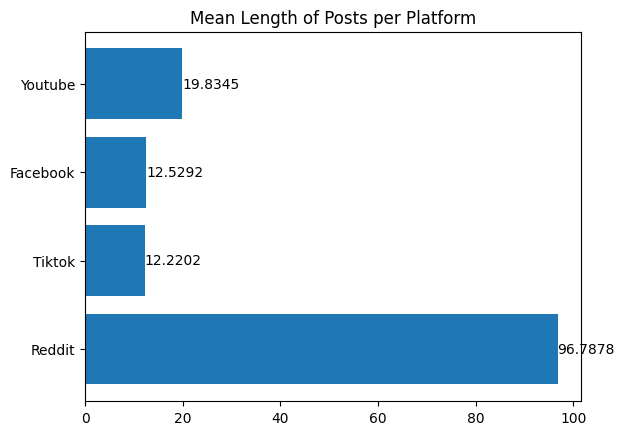

In [71]:
fig, ax = plt.subplots()
bars = ax.barh(platforms, mean_lengths)
ax.bar_label(bars)
plt.title("Mean Length of Posts per Platform")
plt.show()

In [72]:
def preview_pie(series, platform):
    labels = topics
    sizes = series["Best Topic"].value_counts().values
    x, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.title(f"Percentage of topics in {platform}")
    plt.show()

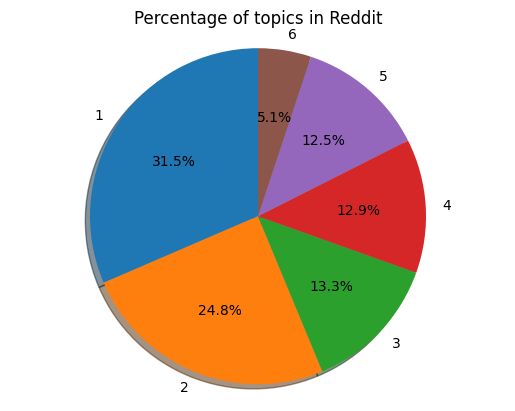

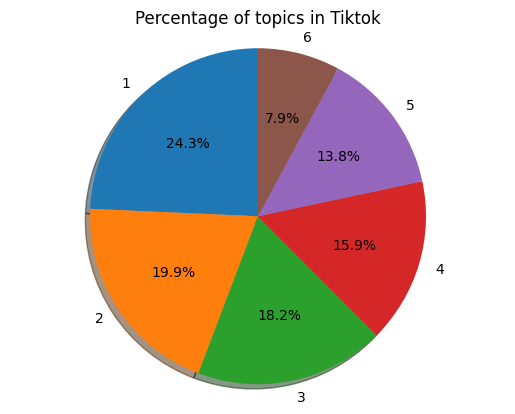

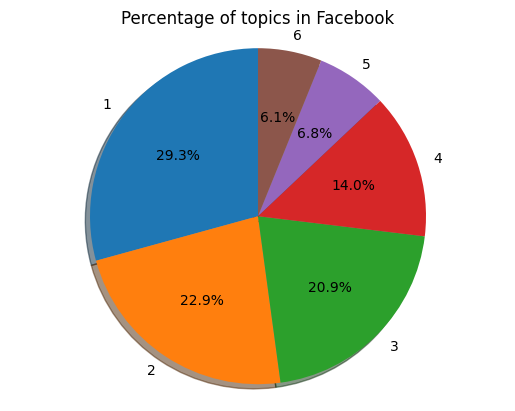

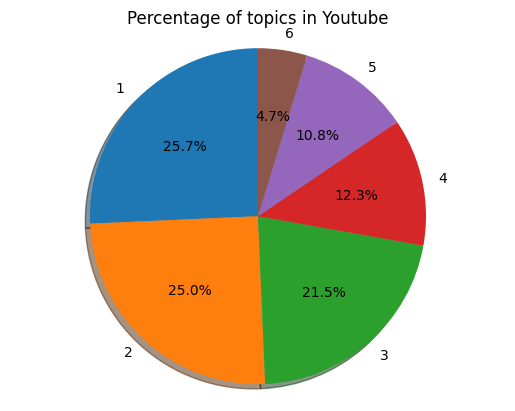

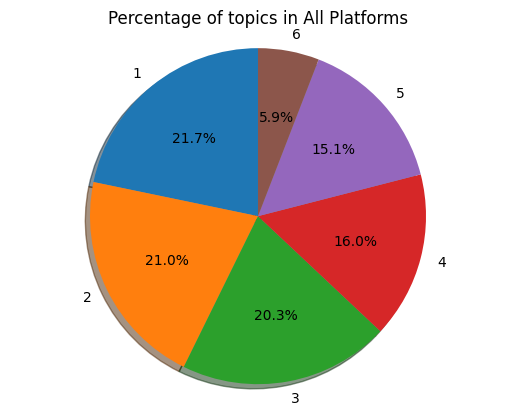

In [73]:
for platform in platforms:
    preview_pie(df[df["Platform"] == platform], platform)
preview_pie(df, "All Platforms")

In [74]:
len(df_raw)

5209

In [75]:
df_raw["Platform"].value_counts()

Reddit      1711
Facebook    1372
Tiktok      1117
Youtube     1009
Name: Platform, dtype: int64

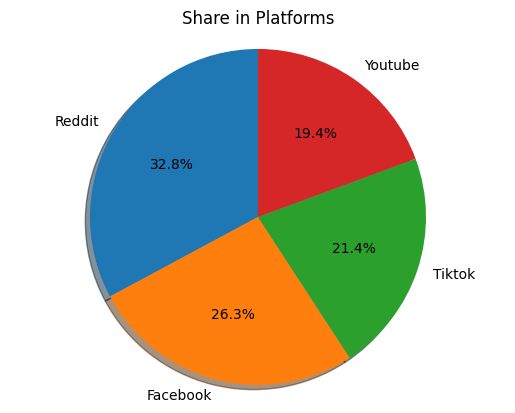

In [76]:
labels = df_raw["Platform"].value_counts().keys()
sizes = df_raw["Platform"].value_counts().values
x, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title(f"Share in Platforms")
plt.show()

In [77]:
df_raw.duplicated().sum()

72

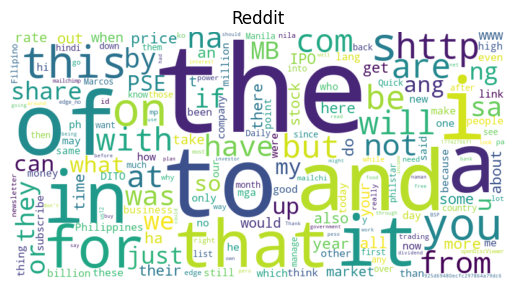

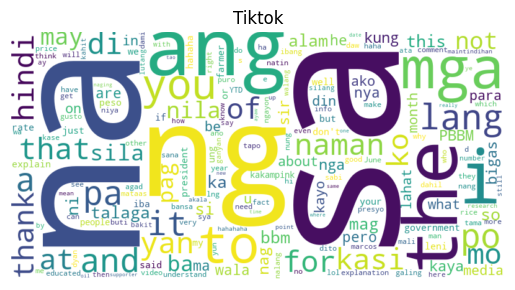

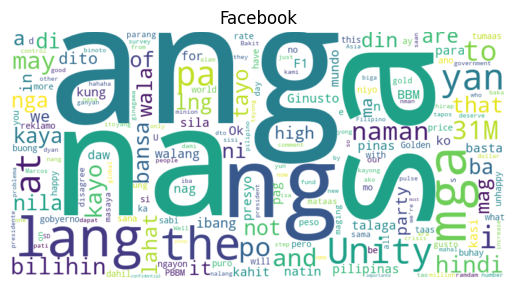

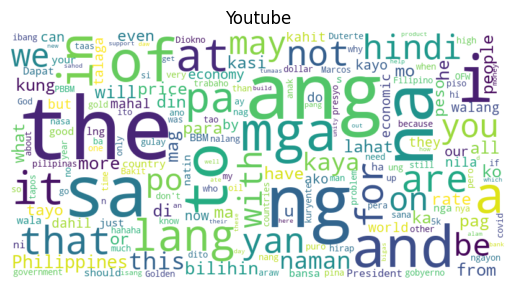

In [78]:
for platform in platforms:
    preview_wordcloud(df_raw[df_raw["Platform"] == platform], platform)

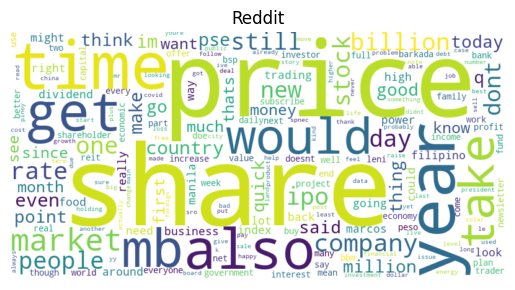

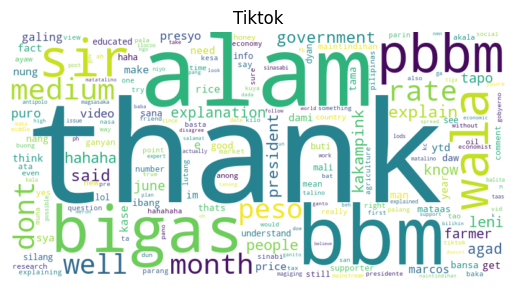

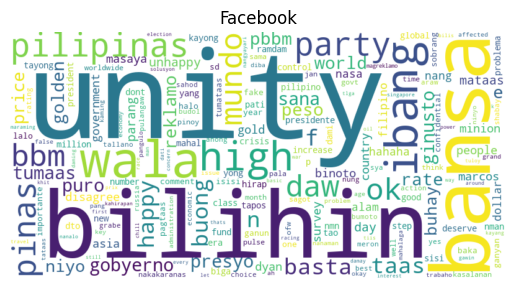

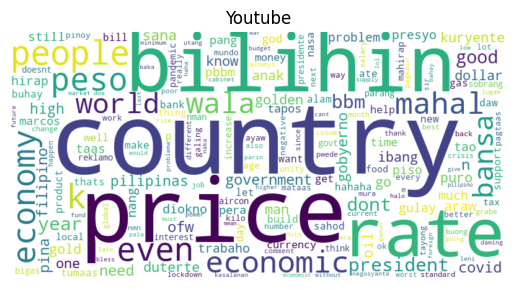

In [79]:
for platform in platforms:
    preview_wordcloud(df[df["Platform"] == platform], platform)

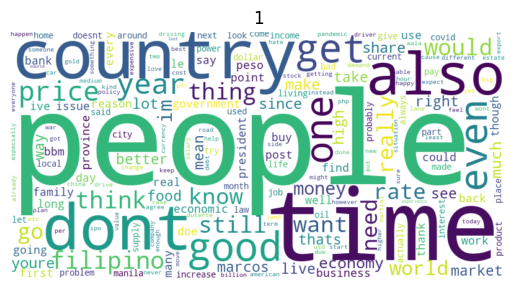

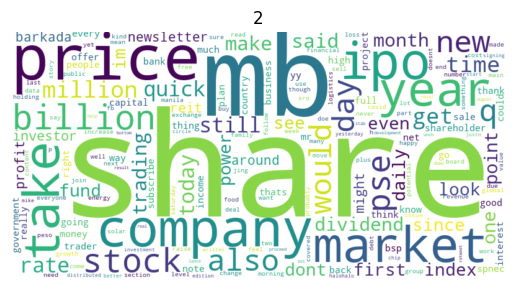

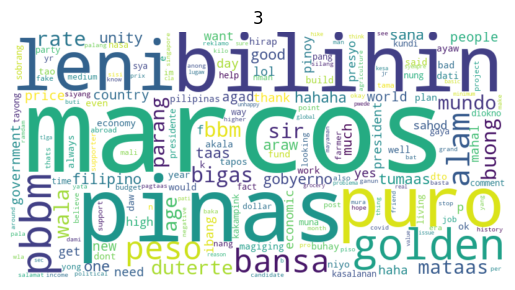

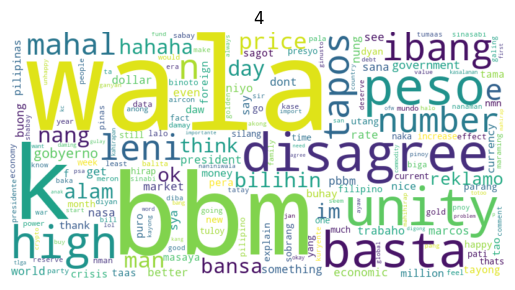

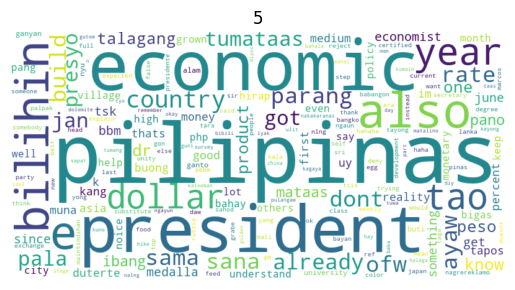

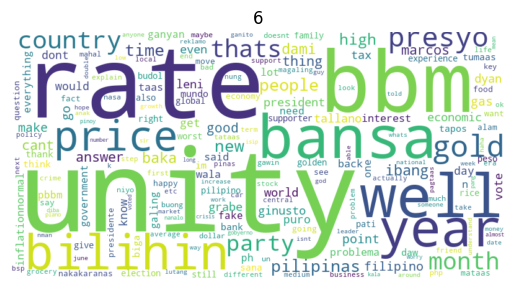

In [80]:
for topic in topics:
    preview_wordcloud(df[df["Best Topic"] == topic], topic)